1. GDM을 이용한 Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

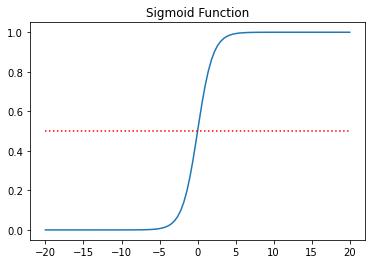

In [183]:
def sigm(x):
  return 1 / (np.exp(-x)+1)

x_plot = np.linspace(-20.0,20.0,100)
y_plot = np.array([0.5]*len(x_plot))
plt.plot(x_plot, sigm(x_plot))
plt.plot(x_plot,y_plot,'r:')
plt.title('Sigmoid Function')
plt.show()

In [184]:
log = pd.read_csv(r'LogisticRegressionData.csv')
x_log = log.iloc[:,:-1].values
y_log = log.iloc[:,-1].values
y_log = y_log.reshape(-1,1)

In [185]:
# Scale X #
x_log_padd =np.c_[np.ones((len(x_log),1)),x_log]

max_iter = 300
eta = 0.1 # Learning rate
w_log = np.ones([2,1]) 
for i in range(max_iter):
  mu = sigm(x_log_padd.dot(w_log))
  gradient_log = x_log_padd.T.dot(mu - y_log)
  w_log = w_log - gradient_log * eta 
w_log

array([[-14.16730242],
       [  3.67771458]])

In [186]:
x_range_log = np.linspace(min(x_log),max(x_log),50)
x_range_log_padd = np.c_[np.ones((len(x_range_log),1)),x_range_log]
y_predict_log = sigm(x_range_log_padd.dot(w_log))

In [244]:
y_predict_org = sigm(x_log_padd.dot(w_log))

zero = np.array([0.0] * len([i for i in y_predict_org if i <= 0.5]))
one = np.array([1.0] * len([i for i in y_predict_org if i>0.5]))
mu_score = np.r_[zero, one]

Score = list(y_log[:,0]==mu_score).count(True) / len(mu_score)
wrong_idx = [i for i in range(len(mu_score)) if y_log[:,0][i] != mu_score[i]]

print(y_log[:,0]==mu_score)
print("Predction score : {}".format(Score))
print("Wrong index : {}".format(wrong_idx))

[ True  True  True  True  True  True False  True False  True  True False
  True  True  True  True  True  True  True  True]
Predction score : 0.85
Wrong index : [6, 8, 11]


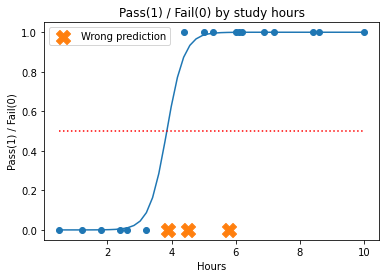

Prediction score is 0.85


In [232]:
plt.scatter(x_log,y_log)
plt.plot(x_range_log, y_predict_log)
plt.plot(x_range_log, [0.5]*len(x_range_log),'r:')
plt.scatter([x_log[i] for i in wrong_idx],[y_log[i] for i in wrong_idx],marker = 'X',s = 200, label = 'Wrong prediction')
plt.title('Pass(1) / Fail(0) by study hours')
plt.xlabel('Hours')
plt.ylabel('Pass(1) / Fail(0)')
plt.legend()
plt.show()
print("Prediction score is {}".format(Score))

In [234]:
# Scale O #
x_log_sc = sc.fit_transform(x_log)
x_log_padd_sc =np.c_[np.ones((len(x_log_sc),1)),x_log_sc]

max_iter = 300
eta = 0.1 # Learning rate
w_log_sc = np.ones([2,1]) 
for i in range(max_iter):
  mu_sc = sigm(x_log_padd_sc.dot(w_log_sc))
  gradient_log_sc = x_log_padd_sc.T.dot(mu_sc - y_log)
  w_log_sc = w_log_sc - gradient_log_sc * eta 
w_log_sc

array([[0.48250371],
       [4.39585463]])

In [235]:
x_range_log_sc = np.linspace(min(x_log_sc),max(x_log_sc),40)
x_range_padd_log_sc = np.c_[np.ones((len(x_range_log_sc),1)),x_range_log_sc]
y_predict_log_sc = sigm(x_range_padd_log_sc.dot(w_log_sc))

In [245]:
y_predict_org_sc = sigm(x_log_padd_sc.dot(w_log_sc))
zero_sc = np.array([0.0] * len([i for i in y_predict_org_sc if i <= 0.5]))
one_sc = np.array([1.0] * len([i for i in y_predict_org_sc if i>0.5]))
mu_score_sc = np.r_[zero_sc, one_sc]

Score_sc = list(y_log[:,0]==mu_score_sc).count(True) / len(mu_score_sc)
wrong_idx_sc = [i for i in range(len(mu_score_sc)) if y_log[:,0][i] != mu_score_sc[i]]

print(y_log[:,0]==mu_score_sc)
print("Predction score : {}".format(Score_sc))
print("Wrong index : {}".format(wrong_idx_sc))

[ True  True  True  True  True  True  True False  True  True  True False
  True  True  True  True  True  True  True  True]
Predction score : 0.9
Wrong index : [7, 11]


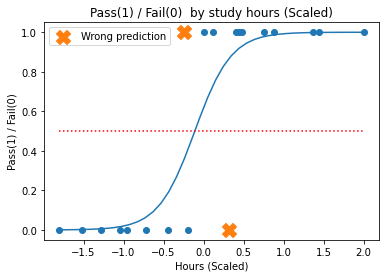

Prediction score is 0.9


In [246]:
plt.scatter(x_log_sc,y_log)
plt.plot(x_range_log_sc,y_predict_log_sc)
plt.title('Pass(1) / Fail(0)  by study hours (Scaled)')
plt.plot(x_range_log_sc, [0.5]*len(x_range_log_sc),'r:')
plt.scatter([x_log_sc[i] for i in wrong_idx_sc],[y_log[i] for i in wrong_idx_sc],marker = 'X', s = 200,label = 'Wrong prediction')
plt.xlabel('Hours (Scaled)')
plt.ylabel('Pass(1) / Fail(0)')
plt.legend()
plt.show()
print("Prediction score is {}".format(Score_sc))

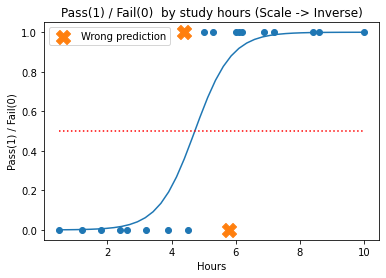

Prediction score is 0.9


In [250]:
x_log_org = sc.inverse_transform(x_range_log_sc)
plt.scatter(x_log,y_log)
plt.plot(x_log_org,y_predict_log_sc)
plt.title('Pass(1) / Fail(0)  by study hours (Scale -> Inverse)')
plt.plot(x_range_log, [0.5]*len(x_range_log),'r:')
plt.scatter([x_log[i] for i in wrong_idx_sc],[y_log[i] for i in wrong_idx_sc],marker = 'X', s = 200,label = 'Wrong prediction')
plt.xlabel('Hours')
plt.ylabel('Pass(1) / Fail(0)')
plt.legend()
plt.show()
print("Prediction score is {}".format(Score_sc))

2. GDM을 이용한 Multi Dimensional Logistic Regression

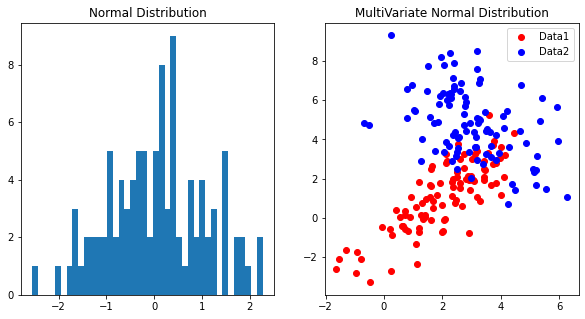

In [268]:
# Random 모듈에 대한 intro #
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
N = 100

plt.figure(figsize = (10,5))

# Normal distribution의 N개의 data 히스토그램으로 plot #
plt.subplot(1,2,1)
A = np.random.randn(N)
plt.title("Normal Distribution")
plt.hist(A,bins = 40)

# Covariance 와 Mean으로 랜덤 data plot #
# Data 변수로 지정할 때 iloc처럼 : 사용해주어야하는 것 주의! #
d1 = np.random.multivariate_normal(mean = [2,1], cov = [[2,2],[2,3]], size = N)
d2 = np.random.multivariate_normal(mean = [3,5], cov = [[2,-1],[-1,3]], size = N)
plt.subplot(1,2,2)
plt.title("MultiVariate Normal Distribution")
plt.scatter(d1[:,0],d1[:,1],color = 'red',label = 'Data1')
plt.scatter(d2[:,0],d2[:,1],color = 'blue',label = 'Data2')
plt.legend()
plt.show()

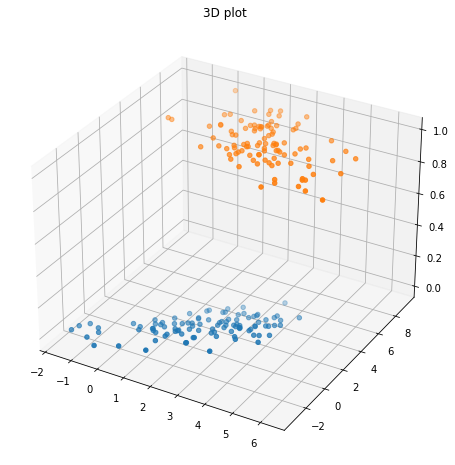

In [269]:
# 3차원 공간 생성 #
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.set_title("3D plot")

# 3차원 data scatter #
ax.scatter(d1[:,0],d1[:,1],0)
ax.scatter(d2[:,0],d2[:,1],1)
plt.show()

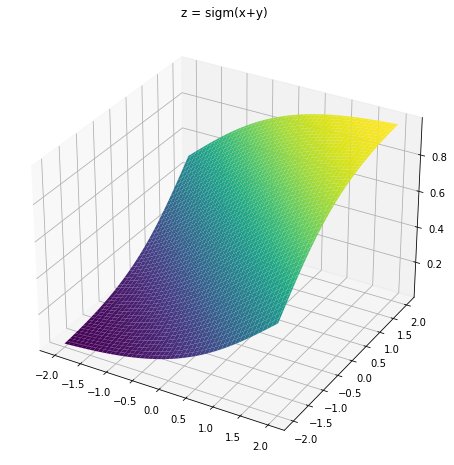

In [264]:
# 3차원 공간에서 곡면 만드는 방법 #
fig1 = plt.figure(figsize = (8,8))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.set_title("z = sigm(x+y)")

# 매끄러운 곡면 위해 x, y meshgrid 생성 #
x_test = np.linspace(-2,2,100)
y_test = np.linspace(-2,2,100)
[xsig, ysig] = np.meshgrid(x_test, y_test) # 격자로 데이터 변환 #
zsig = sigm(xsig + ysig)
ax1.plot_surface(xsig, ysig, zsig,cmap = 'viridis')
plt.show()

In [266]:
x_df = np.r_[d1,d2]
x_df_padd = np.c_[np.ones((len(d1)+len(d2),1)),x_df]
y_df = np.r_[np.zeros((len(d1),1)),np.ones((len(d2),1))]

In [270]:
max_iter = 300
eta = 0.1 # Learning rate
w_multi = np.ones([3,1]) 
for i in range(max_iter):
  mu_multi = sigm(x_df_padd.dot(w_multi))
  gradient_multi = x_df_padd.T.dot(mu_multi - y_df)
  w_multi = w_multi - gradient_multi * eta 
w_multi

array([[-110.38236655],
       [   4.23519063],
       [  24.45840445]])

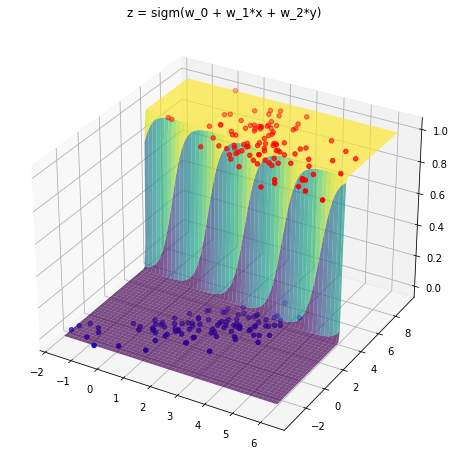

In [273]:
y_predict_multi = sigm(x_df_padd.dot(w_multi))

fig3 = plt.figure(figsize = (8,8))
ax3 = fig3.add_subplot(111, projection = '3d')
ax3.set_title("z = sigm(w_0 + w_1*x + w_2*y)")

xsig_test = np.linspace(min(x_df[:,0]),max(x_df[:,0]),100)
ysig_test = np.linspace(min(x_df[:,1]),max(x_df[:,1]),100)
[xsigm,ysigm] = np.meshgrid(xsig_test, ysig_test)
zsigm = sigm(w_multi[0]+w_multi[1]*xsigm+w_multi[2]*ysigm)
ax3.plot_surface(xsigm, ysigm, zsigm,cmap = 'viridis',alpha = 0.7)

ax3.scatter(d1[:,0],d1[:,1],0, color = 'blue')
ax3.scatter(d2[:,0],d2[:,1],1, color = 'red')
plt.show()

3. GDM을 이용한 Multiclass Logistic Regression

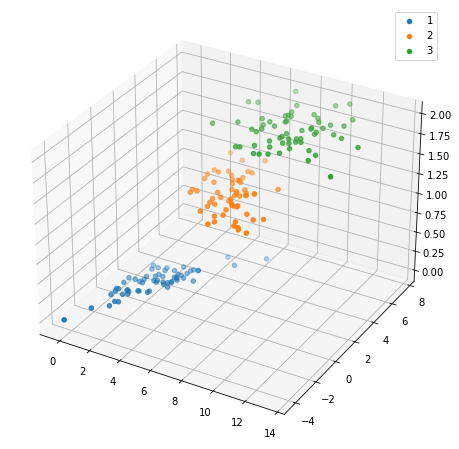

In [289]:
N = 60
d1 = np.random.multivariate_normal(mean = [2,1], cov = [[2,2],[2,3]], size = N)
d2 = np.random.multivariate_normal(mean = [5,4], cov = [[2,-1],[-1,3]], size = N)
d3 = np.random.multivariate_normal(mean = [9,6], cov = [[3,1],[1,3]], size = N)

# 3차원 공간 생성 #
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')

# 3차원 data scatter #
ax.scatter(d1[:,0],d1[:,1],0,label = 1)
ax.scatter(d2[:,0],d2[:,1],1,label = 2)
ax.scatter(d3[:,0],d2[:,1],2,label = 3)
ax.legend()
plt.show()

In [279]:
x_1 = np.r_[np.r_[d1,d2],d3]
x_1_padd = np.c_[np.ones((len(d1)+len(d2)+len(d3),1)), x_1]
y_1 = np.r_[np.zeros((len(d1)+len(d2),1)),np.ones((len(d3),1))]

In [280]:
max_iter = 300
eta = 0.1 # Learning rate
w_1 = np.ones([3,1]) 
for i in range(max_iter):
  mu_1 = sigm(x_1_padd.dot(w_1))
  gradient_1 = x_1_padd.T.dot(mu_1 - y_1)
  w_1 = w_1 - gradient_1 * eta 
w_1

C:\Users\윤철환\AppData\Local\Temp\ipykernel_15372\3394834638.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(-x)+1)


array([[-291.40205676],
       [  37.95338565],
       [  20.43589189]])

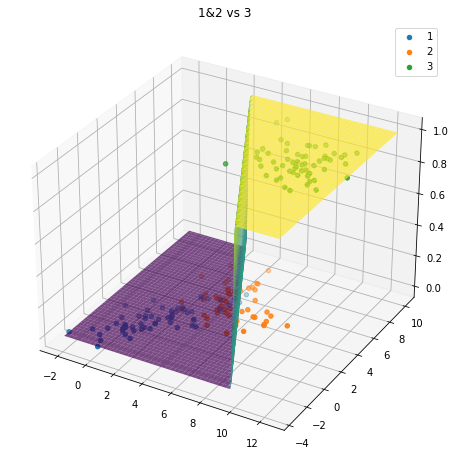

In [288]:
y_predict_1 = sigm(x_1_padd.dot(w_1))

fig1 = plt.figure(figsize = (8,8))
ax1 = fig1.add_subplot(111, projection = '3d')

xsig_1 = np.linspace(min(x_1[:,0]),max(x_1[:,0]),100)
ysig_1 = np.linspace(min(x_1[:,1]),max(x_1[:,1]),100)
[xsigm_1,ysigm_1] = np.meshgrid(xsig_1, ysig_1)
zsigm_1 = sigm(w_1[0]+w_1[1]*xsigm_1+w_1[2]*ysigm_1)
ax1.plot_surface(xsigm_1, ysigm_1, zsigm_1,cmap = 'viridis',alpha = 0.7)

ax1.set_title('1&2 vs 3')
ax1.scatter(d1[:,0],d1[:,1],0, label = 1)
ax1.scatter(d2[:,0],d2[:,1],0, label = 2)
ax1.scatter(d3[:,0],d2[:,1],1, label = 3)
ax1.legend()
plt.show()

In [282]:
x_0 = np.r_[d1,d2]
x_0_padd = np.c_[np.ones((len(d1)+len(d2),1)), x_0]
y_0 = np.r_[np.zeros((len(d1),1)),np.ones((len(d2),1))]

In [283]:
max_iter = 300
eta = 0.1 # Learning rate
w_0 = np.ones([3,1]) 
for i in range(max_iter):
  mu_0 = sigm(x_0_padd.dot(w_0))
  gradient_0 = x_0_padd.T.dot(mu_0 - y_0)
  w_0 = w_0 - gradient_0 * eta 
w_0

array([[-55.89136471],
       [  7.06554656],
       [  6.42158201]])

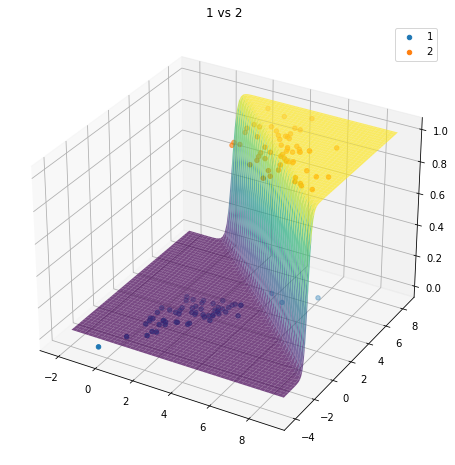

In [290]:
y_predict_0 = sigm(x_0_padd.dot(w_0))

fig2 = plt.figure(figsize = (8,8))
ax2 = fig2.add_subplot(111, projection = '3d')

xsig_0 = np.linspace(min(x_0[:,0]),max(x_0[:,0]),100)
ysig_0 = np.linspace(min(x_0[:,1]),max(x_0[:,1]),100)
[xsigm_0,ysigm_0] = np.meshgrid(xsig_0, ysig_0)
zsigm_0 = sigm(w_0[0]+w_0[1]*xsigm_0+w_0[2]*ysigm_0)
ax2.plot_surface(xsigm_0, ysigm_0, zsigm_0,cmap = 'viridis',alpha = 0.7)

ax2.set_title('1 vs 2')
ax2.scatter(d1[:,0],d1[:,1],0, label = 1)
ax2.scatter(d2[:,0],d2[:,1],1, label = 2)
ax2.legend()
plt.show()